## 2D - Fermions Dots

In [1]:
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/def_final_results_omega_{omega}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_hf.csv"
data_dmc_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_dmc.csv"

from nqs.state.utils import plot_style

import pandas as pd


omegas = [0.1, 0.28, 0.5, 1.0]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)



In [7]:
# merge them all into one df
df = pd.concat(dfs)

# drop if samples is not 16777216
#df = df[df["nsamples"] == 16777216]

# # drop duplicate E_energy, keep the first one
df = df.drop_duplicates(subset=["E_energy", "n_particles", "omega"], keep="first")

# see how many df[nqs_type] are of type "DSFFN" or dsffn
#print(df["nqs_type"].unique())
# count how many are of type "DSFFN" or dsffn
#print(df["nqs_type"].value_counts())



df_hf = pd.read_csv(data_hf_path)
df_dmc = pd.read_csv(data_dmc_path)
#print(df_hf)

# make df_hf["Energy"] be called E_energy, and df_hf["N"] be called n_particles and df_hf["omega"] be called omega
df_hf = df_hf.rename(columns={"Energy": "E_energy", "N": "n_particles", "omega": "omega"})
df_dmc = df_dmc.rename(columns={"Energy": "E_energy", "N": "n_particles", "omega": "omega"})
# drop all columns except n_particles, omega, and E_energy
df_hf = df_hf[["n_particles", "omega", "E_energy"]]
df_dmc = df_dmc[["n_particles", "omega", "E_energy"]]
# now add the value of df_hf to df under the nqs_type = "HF", when n_particles matches and omega matches

df = df.merge(df_hf, on=["n_particles", "omega"], how="left")
df = df.merge(df_dmc, on=["n_particles", "omega"], how="left")
# now correct the energy columns to be E_energy_nqs, E_energy_hf, E_energy_dmc

df = df.rename(columns={"E_energy": "E_energy_dmc", "E_energy_x": "E_energy", "E_energy_y": "E_energy_hf"})

# keep only E_energy(error), 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', n_paticles, and omega and nqs_type
df = df[['E_energy(error)', 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', 'n_particles', 'omega', 'nqs_type', 'E_energy_hf',"E_energy_dmc" ,
         "E_std_error", "K_std_error", "PE_trap_std_error", "PE_int_std_error"]]

# rename to make  E_energy(error) = E, K_energy(error) = $\langle \hat{K}$ \\rangle, PE_trap_energy(error) = $\langle \hat{V}_{trap} \\rangle$, PE_int_energy(error) = $\langle \hat{V}_{int} \\rangle$
df = df.rename(columns={"E_energy(error)": "E","E_energy_dmc":"$E_{dmc}$","E_energy_hf":"$E_{hf}$", "K_energy(error)": "$\langle \hat{K} \rangle$", "PE_trap_energy(error)": "$\langle \hat{V}_{trap} \rangle$", "PE_int_energy(error)": "$\langle \hat{V}_{int} \rangle$"})

# check if there are two rows with the same n_particles and omega, and if so, print them
duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    # keep the lowest E_energy
    df = df.sort_values("E").drop_duplicates(subset=["n_particles", "omega", "nqs_type"], keep="first")



# # check if duplicattes again
duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    print(duplicates)
    raise ValueError("There are still duplicates")

# get some latex printout
# first, aggregate N, and have columsn omega, VMC, DSFFN ,HF, DMC, RBM
######## LATEX STUFF

df = df.rename(columns={"n_particles": "N"})

df = df[["N", "omega", "E", "$E_{hf}$","nqs_type","$E_{dmc}$", "E_std_error"]]

##### latex stuff to save if needed
# Pivot the dataframe to reshape it as needed
#reshaped_df = df.pivot(index=['N', 'omega'], columns='nqs_type', values='E').reset_index()
#reshaped_df = pd.merge(reshaped_df, df[['N', 'omega', '$E_{hf}$', "$E_{dmc}$"]].drop_duplicates(), on=['N', 'omega'])
# # Sort the dataframe by the number of particles
#reshaped_df = reshaped_df.sort_values(["N"])
# Add the E_hf column back to the reshaped dataframe





# # rename vmc to VMC, dsffn to DSFFN, hf to HF, dmc to DMC, rbm to RBM
#reshaped_df = reshaped_df.rename(columns={"vmc": "VMC", "dsffn": "DSFFN", "rbm": "RBM", "omega": "$omega$", "$E_{hf}$": "$E_{HF}$", "$E_{dmc}$": "$E_{DMC}$"})

# # noq agglutinate number of particles N


# #print(reshaped_df.to_latex(index=False, escape=False, column_format="c|c|c|c|c|c|c"))
# print("df.columns",df.columns)
#df = df[['E', '$\langle \hat{K} \rangle$', '$\langle \hat{V}_{trap} \rangle$',
#       '$\langle \hat{V}_{int} \rangle$', 'N', 'omega', 'nqs_type']]



#df = df[df["N"] == 6]
# # # sort by nqs_type
#df = df.sort_values("nqs_type")
# # print(df)
# # # change it to first column

#df = df[["nqs_type", "E", "omega","$\langle \hat{K} \rangle$", "$\langle \hat{V}_{trap} \rangle$", "$\langle \hat{V}_{int} \rangle$"]]
#print(df)

#print(df.to_latex(index=False, escape=False, column_format="c|c|c|c|c"))






\begin{tabular}{c|c|c|c|c}
\toprule
angle$ \\$\langle \hat{V}_{int}  hat{K} 
\midrule
dsffn & 11.823(1) & 0.500000 & 1.769(3) & 4.261(5) & 5.793(3) \\
dsffn & 20.189(1) & 1.000000 & 3.498(5) & 7.651(7) & 9.040(4) \\
dsffn & 3.5975(7) & 0.100000 & 0.377(1) & 1.266(2) & 1.954(2) \\
dsffn & 7.6481(9) & 0.280000 & 1.008(2) & 2.756(4) & 3.884(3) \\
rbm & 11.8778(9) & 0.500000 & 1.787(2) & 4.308(4) & 5.782(3) \\
rbm & 20.2826(8) & 1.000000 & 3.539(4) & 7.658(5) & 9.086(3) \\
rbm & 3.5917(5) & 0.100000 & 0.386(1) & 1.292(2) & 1.913(1) \\
rbm & 7.6617(7) & 0.280000 & 1.016(2) & 2.702(3) & 3.943(2) \\
vmc & 11.8432(8) & 0.500000 & 1.748(2) & 4.370(3) & 5.725(2) \\
vmc & 20.1908(8) & 1.000000 & 3.461(4) & 7.727(5) & 9.003(3) \\
vmc & 3.6281(6) & 0.100000 & 0.412(1) & 1.397(2) & 1.819(1) \\
vmc & 7.6657(7) & 0.280000 & 1.009(2) & 2.729(2) & 3.928(2) \\
\bottomrule
\end{tabular}



In [83]:

#print complete view even if large

pd.set_option('display.max_rows', None)



# let us get total energy as a function of omega for all nqs_types. Let us do that only for N2, n4 and n6 particles

#df = df[df["n_particles"].isin([2, 4, 6])]

# Make E value numeric and without (error) in the ty
#df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

# write this to a csv   
#df.to_csv("/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/big_data_all.csv", index=False)

In [84]:

# Make E value numeric and without (error) in the ty
df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

In [87]:
# sort by the omega row
df = df.sort_values("omega")

# redefine the E column to be E_0 , where E_0 is the non-interacting energy, given by 

def E_0(N,omega):
    analytical = {"2": omega*2, "6":10*omega, "12": 28*omega, "20": 68*omega}
    return analytical[str(N)]

df["E_0"] = df.apply(lambda x: E_0(x["N"], x["omega"]), axis=1)

df["E/E_0"] = df["E"]/df["E_0"]

KeyError: 'N'

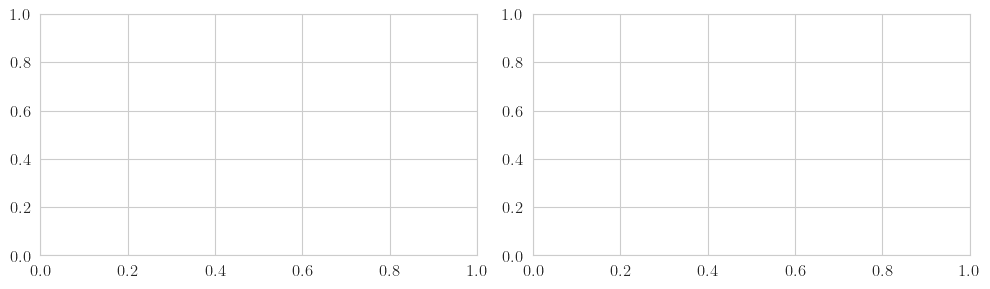

In [8]:
# now make a plot of E vs omega for all nqs_types. each line is a nqs_type and there are 3 different plots side by side, then make also e - E_hf
import matplotlib.pyplot as plt

for i, n_particles in enumerate([2, 6, 12, 20]):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    for nqs_type in df["nqs_type"].unique():
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["N"] == n_particles)]
        # change line style
        if nqs_type == "rbm":
            linestyle = "-"
        elif nqs_type == "vmc":
            linestyle = ":"
        elif nqs_type == "dsffn":
            linestyle = "-."

        axs[0].plot(df_nqs["omega"], df_nqs["E/E_0"], label=nqs_type, linestyle=linestyle)
        # add error as shaded region
        axs[0].fill_between(df_nqs["omega"], df_nqs["E/E_0"] - df_nqs["E_std_error"], df_nqs["E/E_0"] + df_nqs["E_std_error"], alpha=0.3)


        axs[1].plot(df_nqs["omega"], df_nqs["E"] - df_nqs["$E_{hf}$"], label=nqs_type, linestyle=linestyle)


    axs[0].set_ylabel("$E/E_0$")

    axs[1].set_ylabel("$E - E_{hf}$")

    axs[0].set_xlabel("$\omega$")
    axs[1].set_xlabel("$\omega$")

    axs[0].set_title(f"$N={n_particles}$", loc="left")
    # add legend
    axs[0].legend()

    plt.tight_layout()

    plot_style.save(f"fermion_dots/total_energy_vs_omega_n{n_particles}")


In [95]:
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/def_final_results_omega_{omega}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_hf.csv"
data_dmc_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_dmc.csv"

from nqs.state.utils import plot_style

import pandas as pd


omegas = [0.1, 0.28, 0.5, 1.0]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)



In [138]:
# merge them all into one df
df = pd.concat(dfs)

# drop if samples is not 16777216
#df = df[df["nsamples"] == 16777216]

# # drop duplicate E_energy, keep the first one
df = df.drop_duplicates(subset=["E_energy", "n_particles", "omega"], keep="first")


df_hf = pd.read_csv(data_hf_path)
df_dmc = pd.read_csv(data_dmc_path)
#print(df_hf)

# make df_hf["Energy"] be called E_energy, and df_hf["N"] be called n_particles and df_hf["omega"] be called omega
df_hf = df_hf.rename(columns={"Energy": "E_energy", "N": "n_particles", "omega": "omega"})
df_dmc = df_dmc.rename(columns={"Energy": "E_energy", "N": "n_particles", "omega": "omega"})
# drop all columns except n_particles, omega, and E_energy
df_hf = df_hf[["n_particles", "omega", "E_energy"]]
df_dmc = df_dmc[["n_particles", "omega", "E_energy"]]
# now add the value of df_hf to df under the nqs_type = "HF", when n_particles matches and omega matches

df = df.merge(df_hf, on=["n_particles", "omega"], how="left")
df = df.merge(df_dmc, on=["n_particles", "omega"], how="left")
# now correct the energy columns to be E_energy_nqs, E_energy_hf, E_energy_dmc

df = df.rename(columns={"E_energy": "E_energy_dmc", "E_energy_x": "E_energy", "E_energy_y": "E_energy_hf"})

# keep only E_energy(error), 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', n_paticles, and omega and nqs_type
df = df[['E_energy(error)', 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', 'n_particles', 'omega', 'nqs_type', 'E_energy_hf',"E_energy_dmc" ,
         "E_std_error", "K_std_error", "PE_trap_std_error", "PE_int_std_error"]]

# rename to make  E_energy(error) = E, K_energy(error) = $\langle \hat{K}$ \\rangle, PE_trap_energy(error) = $\langle \hat{V}_{trap} \\rangle$, PE_int_energy(error) = $\langle \hat{V}_{int} \\rangle$
df = df.rename(columns={"E_energy(error)": "E","E_energy_dmc":"$E_{dmc}$","E_energy_hf":"$E_{hf}$", "K_energy(error)": "$\langle \hat{K} \rangle$", "PE_trap_energy(error)": "$\langle \hat{V}_{trap} \rangle$", "PE_int_energy(error)": "$\langle \hat{V}_{int} \rangle$"})

# check if there are two rows with the same n_particles and omega, and if so, print them
duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    # keep the lowest E_energy
    df = df.sort_values("E").drop_duplicates(subset=["n_particles", "omega", "nqs_type"], keep="first")



# # check if duplicattes again
duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    print(duplicates)
    raise ValueError("There are still duplicates")

# get some latex printout
# first, aggregate N, and have columsn omega, VMC, DSFFN ,HF, DMC, RBM
######## LATEX STUFF

df = df.rename(columns={"n_particles": "N"})

df.columns



Index(['E', '$\langle \hat{K} \rangle$', '$\langle \hat{V}_{trap} \rangle$',
       '$\langle \hat{V}_{int} \rangle$', 'N', 'omega', 'nqs_type', '$E_{hf}$',
       '$E_{dmc}$', 'E_std_error', 'K_std_error', 'PE_trap_std_error',
       'PE_int_std_error'],
      dtype='object')

In [139]:
# Assuming df is your dataframe and is already loaded
import seaborn as sns
# Convert energy components to numeric
df["$\langle \hat{K} \rangle$"] = df["$\langle \hat{K} \rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{trap} \rangle$"] = df["$\langle \hat{V}_{trap} \rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{int} \rangle$"] = df["$\langle \hat{V}_{int} \rangle$"].apply(lambda x: float(x.split("(")[0]))
#df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))
# convert all columns to numeric
# sort by the omega row
df = df.sort_values("omega")

# let us create a column of K / (V trap + V int)

df["K/(V_trap + V_int)"] = df["$\langle \hat{K} \rangle$"] / (df["$\langle \hat{V}_{trap} \rangle$"] + df["$\langle \hat{V}_{int} \rangle$"])







Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_dots/energy_components_vs_omega.pdf


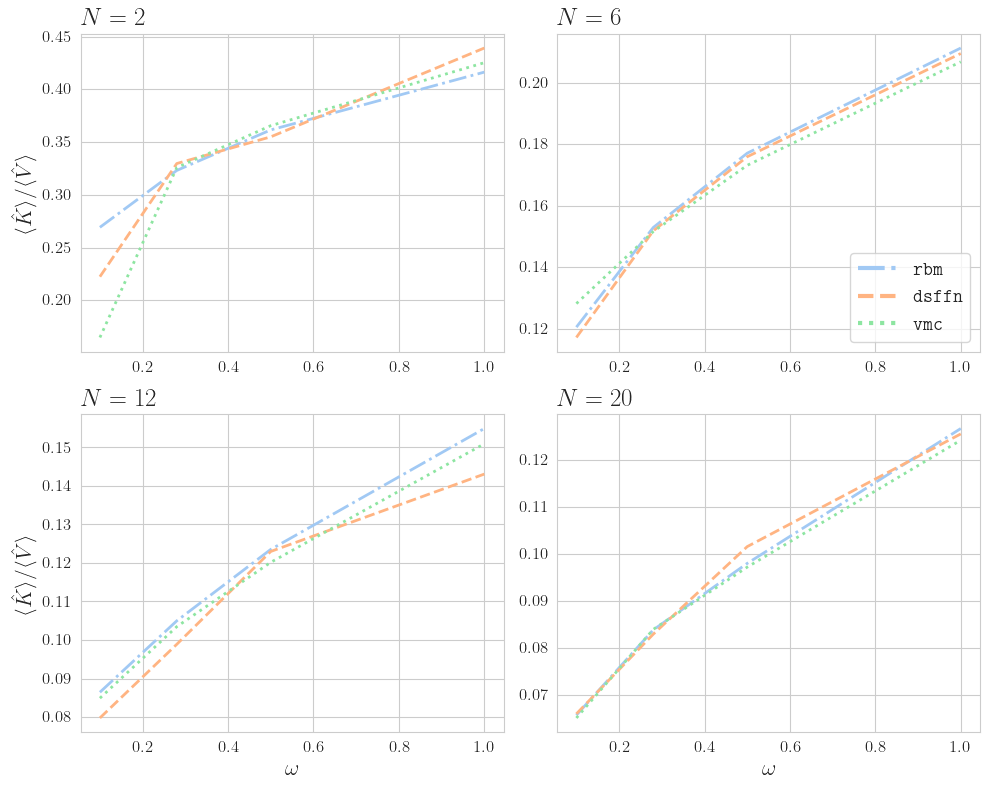

In [154]:

from matplotlib.lines import Line2D

# Assuming df is already defined
pastel_colors = sns.color_palette("pastel", len(df["nqs_type"].unique()))

n_particles_list = [2, 6, 12, 20]
fig, axs = plt.subplots(2, 2, figsize=(9, 7))  # Adjust the figsize as needed

nqs_types = df["nqs_type"].unique()
linestyles = ["-.", "--", ":", ":"]

# Create a dictionary for different line styles for each nqs_type
line_styles_dict = {nqs_type: linestyles[i % len(linestyles)] for i, nqs_type in enumerate(nqs_types)}


# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, n_particles in enumerate(n_particles_list):
    for color, nqs_type in zip(pastel_colors, nqs_types):
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["N"] == n_particles)]

        linestyle = line_styles_dict[nqs_type]

        # Plot the energy fractions
        axs[i].plot(df_nqs["omega"], df_nqs["K/(V_trap + V_int)"], color=color, label=f"{nqs_type}" if i == 0 else "", linestyle=linestyle)

    if i > 1:
        axs[i].set_xlabel("$\omega$")
    axs[i].set_title(f"$N={n_particles}$", loc="left")

legend_colors = [Line2D([0], [0], color=color, lw=3, label=nqs_type, linestyle=linestyle) for color, nqs_type, linestyle in zip(pastel_colors, nqs_types, linestyles)]

# Add legend to the first subplot
axs[1].legend(handles=legend_colors, loc='lower right')

# Set ylabel for the first column of subplots
axs[0].set_ylabel("$\langle \hat{K} \\rangle / \langle \hat{V}\\rangle$")
axs[2].set_ylabel("$\langle \hat{K} \\rangle / \langle \hat{V}\\rangle$")

plt.tight_layout()





plot_style.save(f"fermion_dots/energy_components_vs_omega")

In [ ]:
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/final_results_omega_{omega}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_dots/data_hf.csv"

omegas = [-20, -10, 0, 10, 20]
dfs = []
for omega in omegas:
    df = pd.read_csv(DATA_PATH.format(omega=omega))
    df["omega"] = omega
    dfs.append(df)


In [ ]:
# merge them all into one df
df = pd.concat(dfs)

# drop if samples is not 16777216
df = df[df["nsamples"] == 16777216]

# # drop duplicate E_energy
df = df.drop_duplicates(subset="E_energy")


df_hf = pd.read_csv(data_hf_path)
df_dmc = pd.read_csv(data_dmc_path)
#print(df_hf)

# make df_hf["Energy"] be called E_energy, and df_hf["A"] be called n_particles and df_hf["omega"] be called omega
df_hf = df_hf.rename(columns={"Energy": "E_energy", "A": "n_particles", "omega": "omega"})
df_dmc = df_dmc.rename(columns={"Energy": "E_energy", "A": "n_particles", "omega": "omega"})
# drop all columns except n_particles, omega, and E_energy
df_hf = df_hf[["n_particles", "omega", "E_energy"]]
df_dmc = df_dmc[["n_particles", "omega", "E_energy"]]
# now add the value of df_hf to df under the nqs_type = "HF", when n_particles matches and omega matches

df = df.merge(df_hf, on=["n_particles", "omega"], how="left")
df = df.merge(df_dmc, on=["n_particles", "omega"], how="left")
# now correct the energy columns to be E_energy_nqs, E_energy_hf, E_energy_dmc

df = df.rename(columns={"E_energy": "E_energy_dmc", "E_energy_x": "E_energy", "E_energy_y": "E_energy_hf"})

# keep only E_energy(error), 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', n_paticles, and omega and nqs_type
df = df[['E_energy(error)', 'K_energy(error)', 'PE_trap_energy(error)', 'PE_int_energy(error)', 'n_particles', 'omega', 'nqs_type', 'E_energy_hf',"E_energy_dmc" ,
         "E_std_error", "K_std_error", "PE_trap_std_error", "PE_int_std_error"]]

# rename to make  E_energy(error) = E, K_energy(error) = $ \hat{K}$\rangle, PE_trap_energy(error) = $ \hat{V}_{trap}\rangle$, PE_int_energy(error) = $ \hat{V}_{int}\rangle$
df = df.rename(columns={"E_energy(error)": "E","E_energy_dmc":"$E_{dmc}$","E_energy_hf":"$E_{hf}$", "K_energy(error)": "$ \hat{K}\rangle$", "PE_trap_energy(error)": "$ \hat{V}_{trap}\rangle$", "PE_int_energy(error)": "$ \hat{V}_{int}\rangle$"})

# check if there are two rows with the same n_particles and omega, and if so, print them
duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
if len(duplicates) > 0:
    print(duplicates)
    # keep the lowest E_energy
#     df = df.sort_values("E").drop_duplicates(subset=["n_particles", "omega", "nqs_type"], keep="first")

# # check if duplicattes again
# duplicates = df[df.duplicated(subset=["n_particles", "omega", "nqs_type"], keep=False)]
# if len(duplicates) > 0:
#     print(duplicates)
#     raise ValueError("There are still duplicates")

# get some latex printout
# first, aggregate N, and have columsn omega, VMC, DSFFN ,HF, DMC, RBM
######## LATEX STUFF

df = df.rename(columns={"n_particles": "N"})
df.columns
#df = df[["N", "omega", "E", "$E_{hf}$","nqs_type"]]

##### latex stuff to save if needed
# # Pivot the dataframe to reshape it as needed
# reshaped_df = df.pivot(index=['N', 'omega'], columns='nqs_type', values='E').reset_index()
# reshaped_df = pd.merge(reshaped_df, df[['N', 'omega', '$E_{hf}$']].drop_duplicates(), on=['N', 'omega'])
# # Sort the dataframe by the number of particles
# reshaped_df = reshaped_df.sort_values(["N"])
# # Add the E_hf column back to the reshaped dataframe


# # Display the reshaped dataframe
# #import ace_tools as tools; tools.display_dataframe_to_user(name="Reshaped DataFrame", dataframe=reshaped_df)
# #reshaped_df.head()

# print(reshaped_df)
# # rename vmc to VMC, dsffn to DSFFN, hf to HF, dmc to DMC, rbm to RBM
# reshaped_df = reshaped_df.rename(columns={"vmc": "VMC", "dsffn": "DSFFN", "rbm": "RBM", "omega": "$omega$", "$E_{hf}$": "$E_{HF}$"})

# # noq agglutinate number of particles N


# print(reshaped_df.to_latex(index=False, escape=False, column_format="c|c|c|c|c|c"))

# df = df[['E', '$ \hat{K}\rangle$', '$ \hat{V}_{trap}\rangle$',
#        '$ \hat{V}_{int}\rangle$', 'N', 'omega', 'nqs_type']]



# df = df[df["N"] == 4]
# # sort by nqs_type
# df = df.sort_values("nqs_type")
# print(df)
# # change it to first column
# df = df[["nqs_type", "E", "$ \hat{K}\rangle$", "$ \hat{V}_{trap}\rangle$", "$ \hat{V}_{int}\rangle$"]]
# print(df.to_latex(index=False, escape=False, column_format="c|c|c|c|c"))

# now I need to select N = 4 and agglutinate the nqs type to be the first column


